In [1]:
from ultron.kdutils.file import load_pickle
import pandas as pd
from ultron.ump.metrics.score import WrsmScorer, BaseScorer
from ultron.ump.metrics.metrics_base import MetricsBase
from matplotlib import pyplot as plt

In [2]:
score_tuple_array = load_pickle('score_tuple.pkl')
#score = load_pickle('scores.pkl')

please wait! load_pickle....: score_tuple.pkl


/workspace/worker/env/lingua/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/workspace/worker/env/lingua/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
scorer = WrsmScorer(score_tuple_array)

/workspace/worker/env/lingua/lib/python3.8/site-packages/Finance_Ultron-1.7.8-py3.8-linux-x86_64.egg/ultron/factor/empyrical/stats.py:690: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
/workspace/worker/env/lingua/lib/python3.8/site-packages/Finance_Ultron-1.7.8-py3.8-linux-x86_64.egg/ultron/factor/empyrical/stats.py:690: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
/workspace/worker/env/lingua/lib/python3.8/site-packages/Finance_Ultron-1.7.8-py3.8-linux-x86_64.egg/ultron/factor/empyrical/stats.py:690: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
/workspace/worker/env/lingua/lib/python3.8/site-packages/Finance_Ultron-1.7.8-py3.8-linux-x86_64.egg/ultron/factor/empyrical/stats.py:690: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
/workspace/worker/env/lingua/lib/python3.8/site-packages/Finance_Ultron-1.7.8-py3.8-linux-x86_64.egg/ultron/factor/empyrical/stats.py:690: RuntimeWarning: invalid v

> /workspace/worker/env/lingua/lib/python3.8/site-packages/Finance_Ultron-1.7.8-py3.8-linux-x86_64.egg/ultron/ump/metrics/score.py(98)__init__()
     96         score_ls = np.linspace(0, 1, self.score_pd.shape[0])
     97         pdb.set_trace()
---> 98         for cn in self.columns_name:
     99             # 每一项的结果rank后填入对应项
    100             score = score_ls[(self.score_pd[cn].rank().values - 1).astype(int)]



IndexError: index -9223372036854775808 is out of bounds for axis 0 with size 135

In [19]:
scorer.fit_score()
scorer.score_pd.tail()

,win_rate,returns,sharpe,max_drawdown,score_win_rate,score_returns,score_sharpe,score_max_drawdown,score
3,0.7184,-0.0017,0.0112,-0.0796,0.750,0.250,0.500,0.250,0.4375
5,0.3996,0.0064,0.0102,-0.0478,0.125,1.000,0.375,0.500,0.5000
8,0.4695,0.0019,0.0166,-0.0040,0.375,0.500,0.750,0.750,0.5938
4,0.5019,0.0030,0.0293,-0.0040,0.625,0.750,0.875,0.625,0.7188
0,0.4703,0.0040,0.0388,-0.0030,0.500,0.875,1.000,0.875,0.8125


In [22]:
# 实例化WrsmScorer，参数weights，只有第二项为1，其他都是0，
# 代表只考虑投资回报来评分
scorer = WrsmScorer(score_tuple_array, weights=[0, 1, 0, 0])
# 返回排序后的队列
scorer_returns_max = scorer.fit_score()
# 因为是倒序排序，所以index最后一个为最优参数
best_score_tuple_grid = score_tuple_array[scorer_returns_max.index[-1]]

In [24]:
metrics = MetricsBase.show_general(best_score_tuple_grid.orders_pd, best_score_tuple_grid.action_pd,
                                        best_score_tuple_grid.capital, best_score_tuple_grid.benchmark)

In [25]:
## 非真实成交的度量，认为资金无限，无资金管理的情况下总体情况
print('买入后卖出的交易数量:{}'.format(metrics.order_has_ret.shape[0]))
print('买入后尚未卖出的交易数量:{}'.format(metrics.order_keep.shape[0]))
print('胜率:{:.4f}%'.format(metrics.win_rate * 100))
print('平均获利期望:{:.4f}%'.format(metrics.gains_mean * 100))
print('平均亏损期望:{:.4f}%'.format(metrics.losses_mean * 100))
print('盈亏比:{:.4f}'.format(metrics.win_loss_profit_rate))
print('所有交易收益比例和:{:.4f} '.format(metrics.order_has_ret.profit_cg.sum()))
print('所有交易总盈亏和:{:.4f} '.format(metrics.all_profit))

买入后卖出的交易数量:1131
买入后尚未卖出的交易数量:1
胜率:39.9646%
平均获利期望:0.1305%
平均亏损期望:-0.0786%
盈亏比:1.0979
所有交易收益比例和:0.0552 
所有交易总盈亏和:67467.4000 


In [4]:
score_array = score_tuple_array[0]

In [6]:
metrics = MetricsBase.show_general(score_array.orders_pd, score_array.action_pd,
                                        score_array.capital, score_array.benchmark)

In [7]:
## 非真实成交的度量，认为资金无限，无资金管理的情况下总体情况
print('买入后卖出的交易数量:{}'.format(metrics.order_has_ret.shape[0]))
print('买入后尚未卖出的交易数量:{}'.format(metrics.order_keep.shape[0]))
print('胜率:{:.4f}%'.format(metrics.win_rate * 100))
print('平均获利期望:{:.4f}%'.format(metrics.gains_mean * 100))
print('平均亏损期望:{:.4f}%'.format(metrics.losses_mean * 100))
print('盈亏比:{:.4f}'.format(metrics.win_loss_profit_rate))
print('所有交易收益比例和:{:.4f} '.format(metrics.order_has_ret.profit_cg.sum()))
print('所有交易总盈亏和:{:.4f} '.format(metrics.all_profit))

买入后卖出的交易数量:538
买入后尚未卖出的交易数量:0
胜率:47.0260%
平均获利期望:0.0797%
平均亏损期望:-0.0637%
盈亏比:1.0974
所有交易收益比例和:0.0192 
所有交易总盈亏和:23023.6500 


<Axes: title={'center': 'profit_cg cumsum'}>

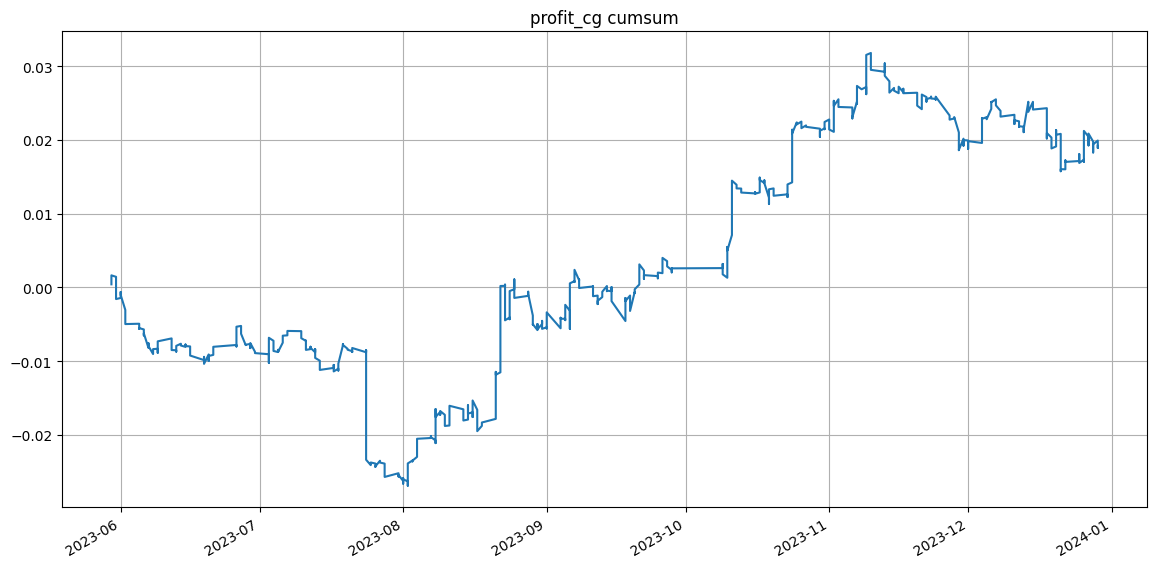

In [10]:
plt.figure(figsize=(14, 7))
metrics.order_has_ret.sort_values('buy_date')['profit_cg'].cumsum().plot(
            grid=True, title='profit_cg cumsum')

In [11]:
## 考虑资金情况下的度量，进行与benchmark的收益度量对比
print('买入后卖出的交易数量:{}'.format(metrics.order_has_ret.shape[0]))
print('买入后尚未卖出的交易数量:{}'.format(metrics.order_keep.shape[0]))

print('胜率:{:.4f}%'.format(metrics.win_rate * 100))

print('平均获利期望:{:.4f}%'.format(metrics.gains_mean * 100))
print('平均亏损期望:{:.4f}%'.format(metrics.losses_mean * 100))

print('盈亏比:{:.4f}'.format(metrics.win_loss_profit_rate))

print('策略收益: {:.4f}%'.format(metrics.algorithm_period_returns *
                                             100))
print('基准收益: {:.4f}%'.format(metrics.benchmark_period_returns *
                                             100))
print('策略年化收益: {:.4f}%'.format(
            metrics.algorithm_annualized_returns * 100))
print('基准年化收益: {:.4f}%'.format(
            metrics.benchmark_annualized_returns * 100))

print('策略买入成交比例:{:.4f}%'.format(metrics.buy_deal_rate * 100))
print('策略资金利用率比例:{:.4f}%'.format(metrics.cash_utilization * 100))
print('策略共执行{}个交易日'.format(metrics.num_trading_days))

买入后卖出的交易数量:538
买入后尚未卖出的交易数量:0
胜率:47.0260%
平均获利期望:0.0797%
平均亏损期望:-0.0637%
盈亏比:1.0974
策略收益: 0.3970%
基准收益: -5.1591%
策略年化收益: 0.0028%
基准年化收益: -0.0367%
策略买入成交比例:100.0000%
策略资金利用率比例:0.2471%
策略共执行35186个交易日


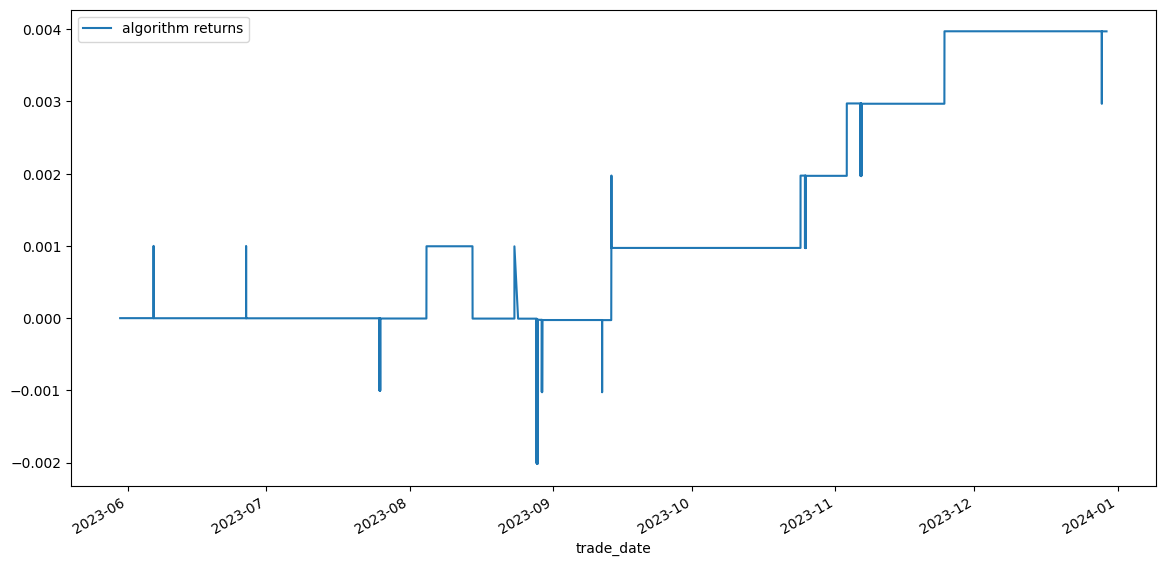

In [14]:
plt.figure(figsize=(14, 7))
#metrics.benchmark_cum_returns.plot()
metrics.algorithm_cum_returns.plot()
plt.legend([ 'algorithm returns'], loc='best')
plt.show()

In [15]:
print('alpha阿尔法:{:.4f}'.format(metrics.alpha))
print('beta贝塔:{:.4f}'.format(metrics.beta))
print('Information信息比率:{:.4f}'.format(metrics.information))

print('策略Sharpe夏普比率: {:.4f}'.format(metrics.algorithm_sharpe))
print('基准Sharpe夏普比率: {:.4f}'.format(metrics.benchmark_sharpe))

print('策略波动率Volatility: {:.4f}'.format(
metrics.algorithm_volatility))
print('基准波动率Volatility: {:.4f}'.format(
            metrics.benchmark_volatility))

alpha阿尔法:0.0000
beta贝塔:0.0006
Information信息比率:0.0021
策略Sharpe夏普比率: 0.0388
基准Sharpe夏普比率: -0.0301
策略波动率Volatility: 0.0007
基准波动率Volatility: 0.0107


<Figure size 1400x700 with 0 Axes>

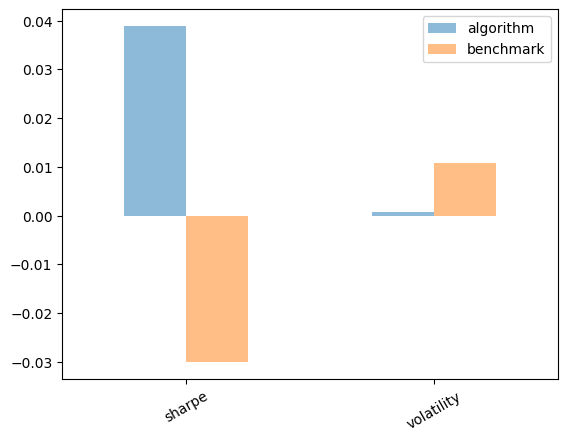

In [18]:
plt.figure(figsize=(14, 7))
sharp_volatility = pd.DataFrame(
            [[metrics.algorithm_sharpe, metrics.benchmark_sharpe],
             [metrics.algorithm_volatility, metrics.benchmark_volatility]])
sharp_volatility.columns = ['algorithm', 'benchmark']
sharp_volatility.index = ['sharpe', 'volatility']
sharp_volatility.plot(kind='bar', alpha=0.5)
_ = plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()